In [1]:
%load_ext autoreload
%autoreload 2
from lcg_plus.base import State
from lcg_plus.states.coherent import order_infidelity_fock_coherent, gen_fock_superpos_coherent
from lcg_plus.states.nongauss import prepare_fock_coherent
from lcg_plus.fidelity import overlap_with_wigner

from lcg_plus.plotting import plot_wig

from matplotlib import pyplot as plt
import numpy as np

from math import factorial

In [2]:
from os import chdir
chdir('../')

In [3]:
#Plotting stuff

import matplotlib as mpl
from matplotlib import pyplot as plt

colwidth = 3.41667
fs = 8
mpl.rcParams.update({'font.size': fs, 
                     "text.usetex":  True, 
                     'font.family':'serif',
                     'xtick.labelsize': 6, 
                     'ytick.labelsize':6 })

fig_kwargs = {'dpi':800, 'bbox_inches': 'tight'}

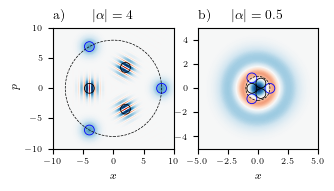

In [63]:

fig, axes = plt.subplots(1,2,figsize = (colwidth, 0.5 * colwidth))
hbar = 2
N = 2
eps1 = 4
eps2 = 0.5

def make_plot(ax, N, eps, xmax = 10, xres = 300):


    x = np.linspace(-xmax,xmax,xres)
    
    state = prepare_fock_coherent(N,1,eps)
    state.normalise() #To get the log_norm
    
    means = state.means
    W = state.get_wigner_log(x,x).real

    infid = order_infidelity_fock_coherent(N, eps)
    
    im = plot_wig(W, x, x, colorbar = False, ax=ax, contourf=True)
    
    Drawing_uncolored_circle = plt.Circle( (0,0 ), np.sqrt(2*hbar)*eps ,fill = False, color = 'black' , linestyle='dashed',linewidth=0.5)
    
    theta = 2*np.pi/(N+1)
    betas = np.zeros(N+1, dtype='complex')
        
    for l in np.arange(N+1):
        betas[l] = eps * np.exp(1j * theta * l)
    
    ax.scatter(means[0:state.num_k,0].real, means[0:state.num_k,1].real, marker='o',facecolors='none',edgecolors='blue', s= 50, linewidth=0.6)
    #ax.scatter(means[state.num_k:,0].real, means[state.num_k:,1].real, marker='o',facecolors='none',edgecolors='k', s  =50, linewidth = 0.6)
        
    #im_eps = ax.text(0.65,0.85, ',size = 10, transform=ax.transAxes )
    ax.set_title(rf'$|\alpha| = {np.round(eps,3)}$')
    ax.set_aspect(1)
    im_circ = ax.add_artist(Drawing_uncolored_circle )

    #ax.set_axis_off

make_plot(axes[0], N ,eps1)
axes[0].set_title('a)', loc = 'left')
make_plot(axes[1], N, eps2, xmax = 5)
axes[1].set_title('b)', loc = 'left')
axes[1].set_ylabel('')
plt.savefig(f'figspaper/linear_comb_gaussians/radius.pdf',**fig_kwargs)
plt.show()

#title = ax.text(0.25,1.01,r' $\mathcal{F}= $'+'{:.5f} with Fock {}'.format(fid,N),transform=ax.transAxes, fontsize =12 )






In [72]:
def make_second_plot(ax, state, xmax = 6, res = 300, factor = 5):


    x = np.linspace(-xmax,xmax,res)
    
    means = state.means
    W = state.get_wigner_log(x,x).real

    real_means = means[0:state.num_k] * factor
    
    im = plot_wig(W, x, x, colorbar = False, ax=ax, contourf=True)
    
    #Drawing_uncolored_circle = plt.Circle( (0,0 ), np.sqrt(2*hbar)*radius ,fill = False, color = 'black' , linestyle='dashed',linewidth=0.5)
    
    ax.scatter(real_means[:,0].real, real_means[:,1].real, marker='o',edgecolors='blue', s= 20, facecolors='none', linewidth=0.5)
        
    im_eps = ax.text(0.15,0.85, rf'$n_c = {state.num_k}, \: n_w= {state.num_weights}$',size = 8, transform=ax.transAxes )
    #im_eps = ax.text(0.55,0.8, rf'$$',size = 8, transform=ax.transAxes )
    # ax.set_title(rf'$|\alpha| = {np.round(eps,3)}$')
    ax.set_aspect(1)
    #im_circ = ax.add_artist(Drawing_uncolored_circle )


Sgate[-1.112,0.000] on mode 0
Sgate[0.722,0.000] on mode 1
Sgate[-0.699,0.000] on mode 2
Sgate[-1.000,0.000] on mode 3
BSgate[0.554,0.000] on modes 0 and 1
BSgate[0.214,0.000] on modes 2 and 3
BSgate[1.021,0.000] on modes 1 and 2
BSgate[1.206,0.000] on modes 0 and 1
BSgate[1.447,0.000] on modes 2 and 3
BSgate[0.971,0.000] on modes 1 and 2
Measuring 4 photons in mode 0.
Data shape before measurement, [(1, 8), (1, 8, 8)].
Probability of measurement = 1.378e-02
Data shape after measurement, [(15, 6), (1, 6, 6)]
Measuring 3 photons in mode 0.
Data shape before measurement, [(15, 6), (1, 6, 6)].
Probability of measurement = 8.919e-04
Data shape after measurement, [(210, 4), (1, 4, 4)]
Measuring 2 photons in mode 0.
Data shape before measurement, [(210, 4), (1, 4, 4)].
Probability of measurement = 7.104e-05
Data shape after measurement, [(1830, 2), (1, 2, 2)]


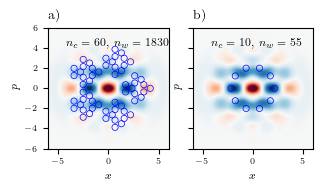

In [73]:
from lcg_plus.operations.circuit_parameters import gen_interferometer_params
from lcg_plus.operations.gbs import build_interferometer


num = 4 #Number of modes
n = 3
ns = np.repeat(n, num-1) #Photon pattern
ns = np.array([4,3,2])
np.random.seed(19) #Seed for random circuit parameters

params = gen_interferometer_params(num, -12)


state = build_interferometer(params, num, out = True)

for i, n in enumerate(ns):

    state.post_select_fock_coherent(0, n, inf=1e-6, out=True )


fig, axes = plt.subplots(1,2,figsize = (colwidth, 0.5 * colwidth), sharex=True, sharey=True)

make_second_plot(axes[0], state, factor = 4)
axes[0].set_title('a)', loc = 'left')


state.reduce_pure(np.sum(ns))
make_second_plot(axes[1], state, factor = 1)
axes[1].set_title('b)', loc = 'left')
plt.savefig(f'figspaper/linear_comb_gaussians/rank_reduce_2.pdf',**fig_kwargs)
plt.show()


In [44]:
64+64*(63)/2

2080.0